In [1]:
# TensorFlow ve Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Diğer gerekli kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
# Veri setinizin yolu
data_dir = 'dataset_gradcam'

# Sınıf isimlerini otomatik olarak almak için
classes = sorted(os.listdir(data_dir))
# Dizin yapısını kontrol etme
sınıflar = []
for emisyon in sorted(os.listdir(data_dir)):
    emisyon_path = os.path.join(data_dir, emisyon)
    if os.path.isdir(emisyon_path):
        for para_birim in sorted(os.listdir(emisyon_path)):
            # Para birimi altındaki görüntü dosyalarını almak için
            para_birim_path = os.path.join(emisyon_path, para_birim)
            if os.path.isdir(para_birim_path):
                sınıf_adı = f"{emisyon}_{para_birim}"  # Sınıf adını oluştur
                sınıflar.append(sınıf_adı)
                print(f"Sınıf: {sınıf_adı}, Resimler: {[img for img in os.listdir(para_birim_path)]}")

# Sınıf isimlerini yazdır
print("Oluşturulan Sınıf İsimleri:", sınıflar)

Sınıf: 1.emisyon_10Lira, Resimler: ['b (1).jpg', 'b (10).jpg', 'b (100).jpg', 'b (101).jpg', 'b (102).jpg', 'b (103).jpg', 'b (104).jpg', 'b (105).jpg', 'b (106).jpg', 'b (107).jpg', 'b (108).jpg', 'b (109).jpg', 'b (11).jpg', 'b (110).jpg', 'b (111).jpg', 'b (112).jpg', 'b (113).jpg', 'b (114).jpg', 'b (115).jpg', 'b (116).jpg', 'b (117).jpg', 'b (118).jpg', 'b (119).jpg', 'b (12).jpg', 'b (120).jpg', 'b (121).jpg', 'b (122).jpg', 'b (123).jpg', 'b (124).jpg', 'b (125).jpg', 'b (126).jpg', 'b (127).jpg', 'b (128).jpg', 'b (129).jpg', 'b (13).jpg', 'b (130).jpg', 'b (131).jpg', 'b (132).jpg', 'b (133).jpg', 'b (134).jpg', 'b (135).jpg', 'b (136).jpg', 'b (137).jpg', 'b (138).jpg', 'b (139).jpg', 'b (14).jpg', 'b (140).jpg', 'b (141).jpg', 'b (142).jpg', 'b (143).jpg', 'b (144).jpg', 'b (145).jpg', 'b (146).jpg', 'b (147).jpg', 'b (148).jpg', 'b (149).jpg', 'b (15).jpg', 'b (150).jpg', 'b (151).jpg', 'b (152).jpg', 'b (153).jpg', 'b (154).jpg', 'b (155).jpg', 'b (156).jpg', 'b (157).jpg

In [8]:
# Veri ön işleme (sadece yeniden ölçeklendirme)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # %80 eğitim, %20 doğrulama
)

# Eğitim veri seti
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(299, 299),  # Xception için giriş boyutu
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Eğitim verisi
    shuffle=True
)

# Doğrulama veri seti
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(299, 299),  # Xception için giriş boyutu
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Doğrulama verisi
    shuffle=False
)

# Veri seti bilgilerini kontrol etme
print("Eğitim veri seti sınıf sayısı:", train_generator.num_classes)
print("Doğrulama veri seti sınıf sayısı:", validation_generator.num_classes)

Found 7443 images belonging to 5 classes.
Found 1858 images belonging to 5 classes.
Eğitim veri seti sınıf sayısı: 5
Doğrulama veri seti sınıf sayısı: 5


In [9]:
# Kendi CNN modelinizi oluşturma
# CNN modeli
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(1024, activation='relu'),
    Dense(len(classes), activation='softmax')  # Sınıf sayısına göre çıktı katmanı
])

# Model özetini görüntüleme
cnn_model.summary()

# Hiperparametreler
learning_rate = 0.001
batch_size = 32
epochs = 10

# Modeli derleme
cnn_model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Modeli eğitme
history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

c:\Users\mseny\OneDrive\Masaüstü\staj\okul\money detection project\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 297, 297, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    67,109,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         5,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,503,429 (257.51 MB)

 Trainable params: 67,503,429 (257.51 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\mseny\OneDrive\Masaüstü\staj\okul\money detection project\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 706s 3s/step - accuracy: 0.4574 - loss: 1.5417 - val_accuracy: 0.5102 - val_loss: 1.6338
Epoch 2/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 875us/step - accuracy: 0.6875 - loss: 0.9133 - val_accuracy: 0.5000 - val_loss: 0.9420
Epoch 3/10


C:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


232/232 ━━━━━━━━━━━━━━━━━━━━ 600s 3s/step - accuracy: 0.6597 - loss: 0.8248 - val_accuracy: 0.6363 - val_loss: 1.4823
Epoch 4/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 313us/step - accuracy: 0.6875 - loss: 0.7915 - val_accuracy: 1.0000 - val_loss: 0.1503
Epoch 5/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 514s 2s/step - accuracy: 0.8435 - loss: 0.4162 - val_accuracy: 0.7004 - val_loss: 1.9044
Epoch 6/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 297us/step - accuracy: 0.8750 - loss: 0.2531 - val_accuracy: 1.0000 - val_loss: 0.0267
Epoch 7/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 515s 2s/step - accuracy: 0.9085 - loss: 0.2260 - val_accuracy: 0.7403 - val_loss: 2.3104
Epoch 8/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 303us/step - accuracy: 0.9062 - loss: 0.2585 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 9/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 518s 2s/step - accuracy: 0.9475 - loss: 0.1387 - val_accuracy: 0.7204 - val_loss: 2.5086
Epoch 10/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 322us/step - accuracy: 0.9062 - loss: 0.1465 - val_accuracy: 

# **Hiperparametre	Değer**
Öğrenme Oranı	0.001 -
Batch Boyutu	32 -
Epoch Sayısı	20 -
Optimizatör	Adam -
Kayıp Fonksiyonu -	Categorical Crossentropy

59/59 ━━━━━━━━━━━━━━━━━━━━ 36s 608ms/step
Sınıflandırma Raporu:
               precision    recall  f1-score   support

   1.emisyon       0.89      0.92      0.91       275
   2.emisyon       0.65      0.81      0.72       603
   3.emisyon       0.74      0.57      0.64       409
   4.emisyon       0.59      0.95      0.73       150
   5.emisyon       0.85      0.53      0.66       421

    accuracy                           0.72      1858
   macro avg       0.74      0.76      0.73      1858
weighted avg       0.75      0.72      0.72      1858



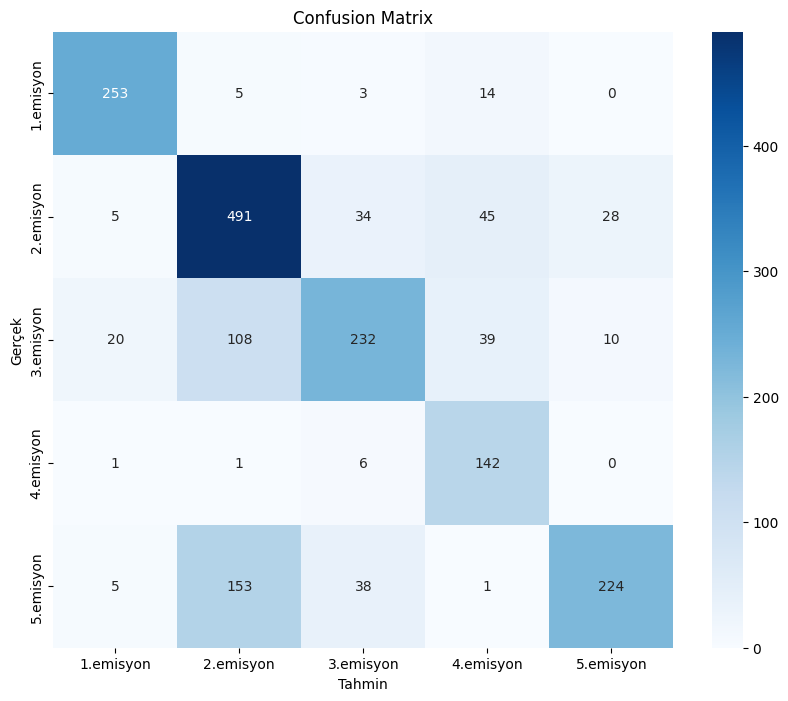

Genel Doğruluk (Accuracy): 0.7223
Genel Precision: 0.7465
Genel Recall: 0.7223
Genel F1-Score: 0.7169


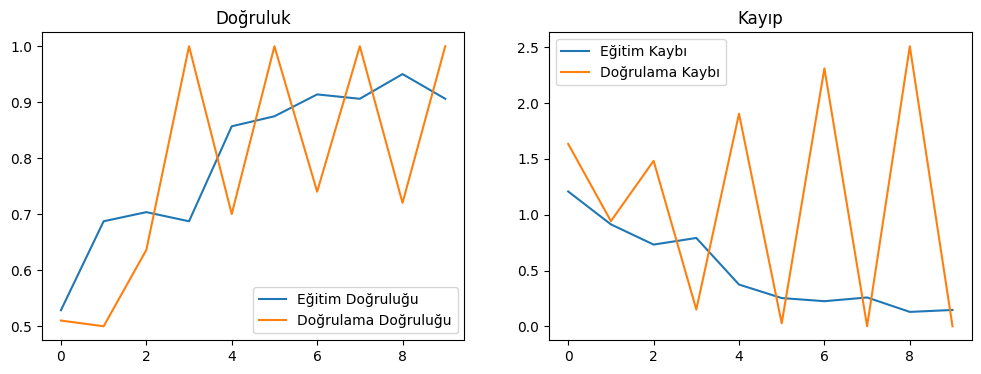

In [10]:
# Gerekli Kütüphaneleri İçe Aktarma
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Doğrulama verileri üzerinde tahmin yapma
validation_generator.reset()
predictions = cnn_model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Her emisyon için sınıflandırma raporu
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Sınıflandırma Raporu:\n", report)

# Karışıklık Matrisi (Confusion Matrix)
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.title('Confusion Matrix')
plt.show()

# Genel başarı metriklerini hesaplama
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted', zero_division=0)
recall = recall_score(true_classes, predicted_classes, average='weighted', zero_division=0)
f1 = f1_score(true_classes, predicted_classes, average='weighted', zero_division=0)

# Genel metrikleri yazdırma
print(f"Genel Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Genel Precision: {precision:.4f}")
print(f"Genel Recall: {recall:.4f}")
print(f"Genel F1-Score: {f1:.4f}")

# Eğitim ve Doğrulama Doğruluğunu Görselleştirme
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.title('Doğruluk')

# Eğitim ve Doğrulama Kayıpını Görselleştirme
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend()
plt.title('Kayıp')
plt.show()
